In [1]:
import matplotlib.pyplot as plt

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import cmocean as cm

In [3]:
import cmocean as cm

In [4]:
#xarray data isolation  by coords
def sectionedArray(file, region):
    lats = np.array(file["latitude"])
    lons = np.array(file["longitude"])
    regionIndices = [np.where(lats == region[0])[0][0],np.where(lats == region[1])[0][0],np.where(lons == region[2])[0][0],np.where(lons == region[3])[0][0]]
    print(regionIndices)
    fileSectioned = file.isel(latitude = slice(regionIndices[1], regionIndices[0]), longitude = slice(regionIndices[2], regionIndices[3]))
    return fileSectioned

In [5]:
file2020 = xr.open_dataset("monthly/globMonthly20202024.grib")
file2010 = xr.open_dataset("monthly/globMonthly20102019sfcvars.grib")
file2000 = xr.open_dataset("monthly/globMonthly20002009sfcvars.grib")
file1990 = xr.open_dataset("monthly/globMonthly19901999sfcvars.grib")
file1980 = xr.open_dataset("monthly/globMonthly19801989sfcvars.grib")

In [90]:
file2020

<xarray.Dataset>
Dimensions:     (time: 52, latitude: 721, longitude: 1440)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2024-04-01
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
    d2m         (time, latitude, longitude) float32 ...
    t2m         (time, latitude, longitude) float32 ...
    sp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-05-18T15:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [91]:
region = [27,30,76,79] #latS, latN, lonW, lonE
file2020 = sectionedArray(file2020, region)
file2010 = sectionedArray(file2010, region)
file2000 = sectionedArray(file2000, region)
file1990 = sectionedArray(file1990, region)
file1980 = sectionedArray(file1980, region)

[252, 240, 304, 316]
[252, 240, 304, 316]
[252, 240, 304, 316]
[252, 240, 304, 316]
[252, 240, 304, 316]


In [121]:
file2020

<xarray.Dataset>
Dimensions:     (time: 52, latitude: 721, longitude: 1440)
Coordinates:
    number      int32 ...
  * time        (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2024-04-01
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
    d2m         (time, latitude, longitude) float32 ...
    t2m         (time, latitude, longitude) float32 ...
    sp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-05-18T16:00 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
fileBank = [file1980, file1990, file2000, file2010, file2020]

In [7]:
# color range calculation for a list of year long time series, do determine the highest and lowest avg temps in the data plotted
plt.rcParams["figure.figsize"] = (25,10)
cmap = cm.cm.balance
colorRange = []
for file in [file2010, file2000, file1990, file1980]:
    timeSeries = pd.to_datetime(file["time"])
    for year in np.unique(timeSeries.year):
        print(year)
        mask = timeSeries.year == year
        plottingArray = np.nanmean(file["t2m"][mask], axis = (1,2))
        colorRange.append(np.nanmean(plottingArray))


2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989


In [8]:
#copernicus anomalies comparison.
copernicus_graph_data = pd.read_csv("berkley historic monthly avg temps/ESOTC_global_temperature_indicator_2023.csv", na_values= -999, index_col = False)
#60-month running mean of global-average temperature anomaly (degrees C)
#Anomaly is relative to 1991-2020. Add 0.88 for values relative to 1850-1900 reference level. -999 denotes no value
 

C:\Users\Karan\AppData\Local\Temp\ipykernel_22016\2562635002.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  copernicus_graph_data = pd.read_csv("berkley historic monthly avg temps/ESOTC_global_temperature_indicator_2023.csv", na_values= -999, index_col = False)


In [9]:
copernicus_graph_data

,start year,month,end year,month.1,ERA5,JRA-3Q,Berkeley Earth,GISTEMP,HadCRUT5,NOAAGlobalTemp,HadCRUT5 min,HadCRUT5 max
0,1850,1,1854,12,NaN,NaN,-0.918,NaN,-0.830,-0.746,-0.944,-0.698
1,1850,2,1855,1,NaN,NaN,-0.908,NaN,-0.820,-0.739,-0.933,-0.686
2,1850,3,1855,2,NaN,NaN,-0.908,NaN,-0.820,-0.737,-0.933,-0.686
3,1850,4,1855,3,NaN,NaN,-0.905,NaN,-0.817,-0.735,-0.928,-0.684
4,1850,5,1855,4,NaN,NaN,-0.899,NaN,-0.809,-0.730,-0.921,-0.676
...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2018,9,2023,8,0.363,0.324,0.329,0.334,0.317,0.331,0.296,0.340
2025,2018,10,2023,9,0.375,0.336,0.341,0.345,0.329,0.341,0.307,0.351
2026,2018,11,2023,10,0.383,0.345,0.348,0.350,0.336,0.347,0.315,0.359
2027,2018,12,2023,11,0.393,0.354,0.357,0.360,0.345,0.357,0.325,0.369


In [10]:
print

<function print>

In [11]:
#Berkley direct download
berk_temp_anomaly = pd.read_csv("berkley historic monthly avg temps/Global Average Temperature Anomaly with Sea Ice Temperature Inferred from Air Temperatures.csv")

In [12]:
berk_temp_anomaly

,year,month,Monthly Anomaly,Monthly unc,Annual Anomaly,Annual unc,Five year Anomaly,Five year unc,Ten year Anomaly,Ten year unc,Twenty year Anomaly,Twenty year unc
0,1850,1,-0.790,0.404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.243,0.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.394,0.449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.625,0.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.652,0.249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2086,2023,11,1.412,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2087,2023,12,1.439,0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2088,2024,1,1.285,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2089,2024,2,1.439,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#manual calculating 60 mon moving avg
berk60monAvgAnom = []
window = 60
for i in range(0, len(berk_temp_anomaly["Monthly Anomaly"]) - window):
    berk60monAvgAnom.append(np.nanmean(berk_temp_anomaly["Monthly Anomaly"][i: i + window]))
    

In [14]:
#combine ERA files to form one long glob avg time series
ERA5timeSeries = []
ERA5time = []

#weighting with lats and averaging into a list, also making a list with timestamps
for file in fileBank:
    tempda =  file["t2m"]
    weights = np.cos(np.deg2rad(tempda.latitude))
    weights.name = "weights"
    fileWeighted = file["t2m"].weighted(weights)
    ERA5time.append(np.array(file["time"]))
    ERA5timeSeries.append(fileWeighted.mean(["longitude", "latitude"]))
    

In [15]:
#Running avg func
def RunningAvgs(array, window):
    windAvgArray = []
    for i in range(0, len(array) - window):
        windAvgArray.append(np.nanmean(array[i: i + window]))
    return windAvgArray

In [16]:
ERA5time = np.concatenate(ERA5time)
ERA5timeSeries = np.concatenate(ERA5timeSeries)

In [17]:
griddedBerktemps = xr.open_dataset("berkley historic monthly avg temps/Land_and_Ocean_LatLong1.nc")

In [18]:
griddedBerktemps

<xarray.Dataset>
Dimensions:      (longitude: 360, latitude: 180, time: 2091, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.024e+03 2.024e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 ...
    temperature  (time, latitude, longitude) float32 ...
    climatology  (month_number, latitude, longitude) float32 ...
Attributes:
    Conventions:           Berkeley Earth Internal Convention (based on CF-1.5)
    title:                 Native Format Berkeley Earth Surface Temperature A...
    history:               09-Apr-2024 08:10:00
    institution:           Berkeley Earth Surface Temperature Project
    land_source_history:   05-Apr-2024 15:18:58
    ocean_source_history:  08-Apr-2024 16:15:50
    comment:               This file contains Berkeley Earth surface temperat...

In [19]:
for i in range(200, 300): 
    plt.imshow(griddedBerktemps["temperature"][i])
    plt.savefig("BerkTempAnims/temps" + str(i))
    plt.clf()

<Figure size 2500x1000 with 0 Axes>

1980
0.20711073567045143
1981
0.3066163134487813
1982
0.03612512112102164
1983
0.16343263186663023
1984
0.10246217297324157
1985
0.00019876270217893612
1986
0.024745956421277547
1987
0.024621729732415713
1988
0.20882506397674477
1989
0.08094611046237174
1990
0.383562324529802
1991
0.316951973962086
1992
0.056895823498720466
1993
0.010435041864394146
1994
0.012522050237272975
1995
0.2636835697781311
1996
0.20840269323461452
1997
0.20542125270193048
1998
0.3269149544088052
1999
0.16770602996347736
2000
0.1904892047007379
2001
0.3270640264354394
2002
0.46773832890258144
2003
0.3767547019801734
2004
0.2855226216800417
2005
0.5768093617232726
2006
0.49658376605629956
2007
0.5510695917911004
2008
0.36987254341722775
2009
0.4933041814703471
2010
0.5292802305647345
2011
0.539740117766901
2012
0.5393425923625431
2013
0.5204849809933166
2014
0.554498248403687
2015
0.6076921165743249
2016
0.9091157544286814
2017
0.7831747372605531
2018
0.7903550398767671
2019
0.8161941911600288
2020
0.90519019106

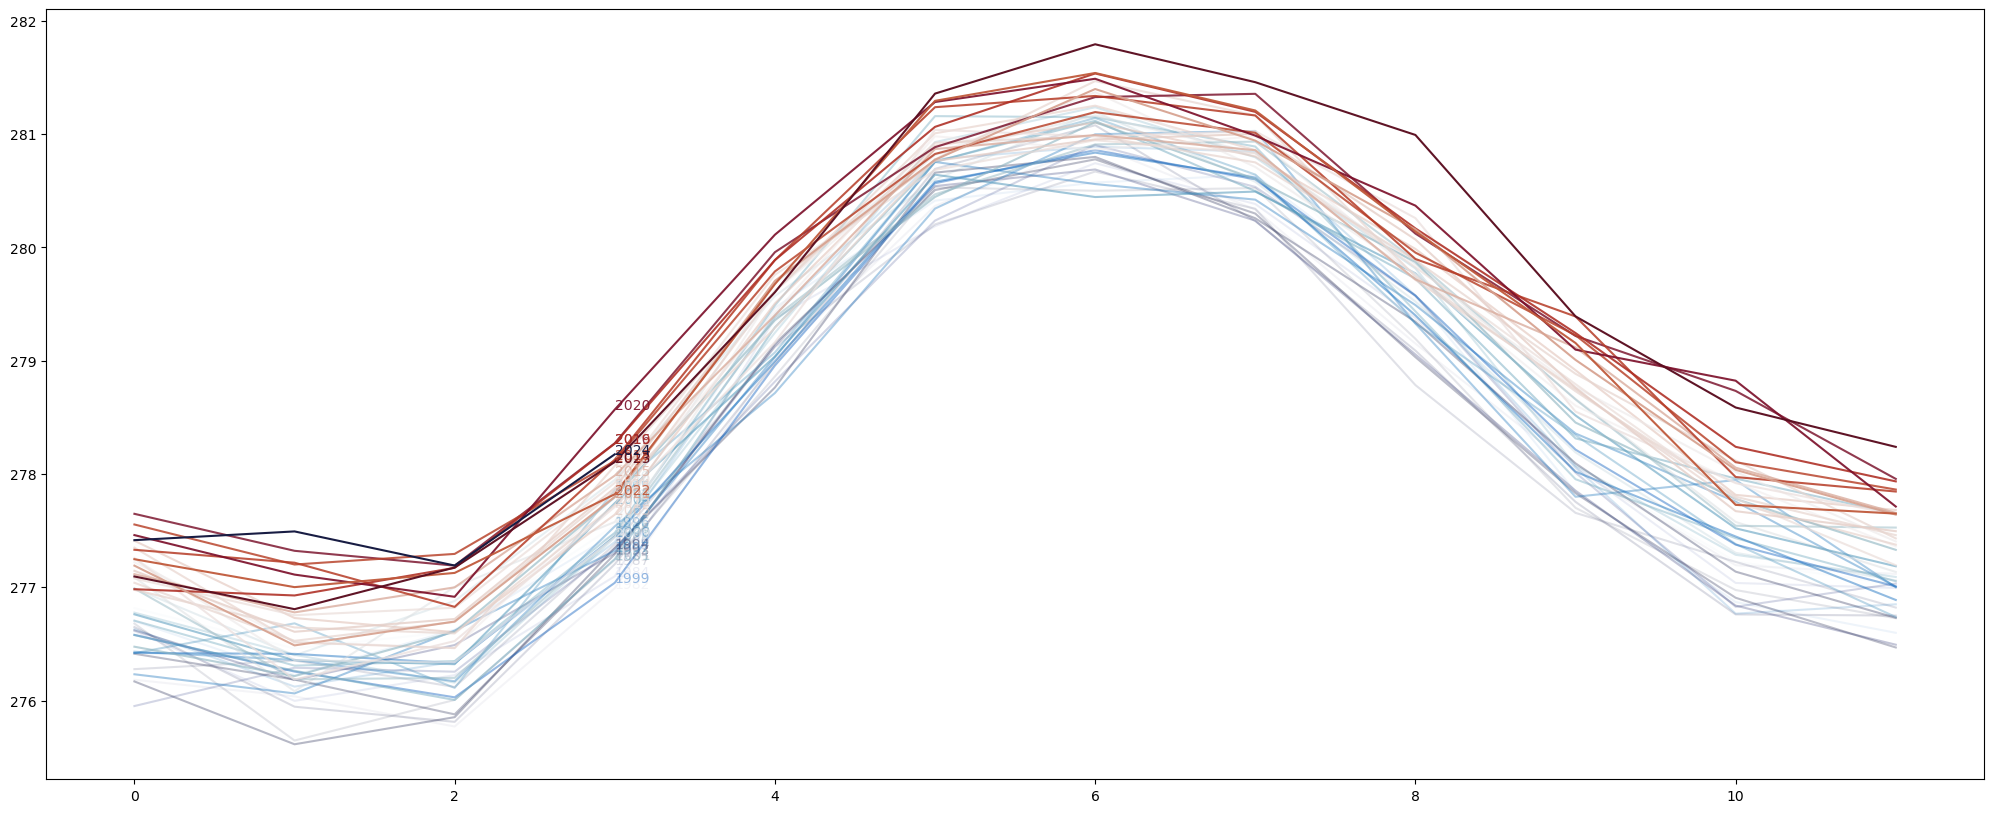

In [20]:
for file in fileBank:
    timeSeries = pd.to_datetime(file["time"])        
    for year in np.unique(timeSeries.year):
        mask = timeSeries.year == year
        colorAssgn = (np.nanmean(file["t2m"][mask]) - min(colorRange))/((max(colorRange) - min(colorRange))*1.1)
        print(year)
        print(colorAssgn)
        plottingArray = np.nanmean(file["t2m"][mask], axis = (1,2))
        plt.plot(plottingArray, color = cmap(colorAssgn), alpha = (year - 1980)/(44))
        plt.text(3,(plottingArray)[3],str(year), color = cmap(colorAssgn), alpha = (year - 1980)/(44)) 

In [21]:
berkAnom18501900 = np.nanmean(np.reshape(berk_temp_anomaly["Monthly Anomaly"][:12*50], (12,50)), axis = 1)

#absolute average reference used in Berkly data from 1950 to 1980 all other anomalies are with respect to this
absTemps19501980 = [12.23,12.44,13.06,13.97,14.94,15.66,15.95,15.78,15.19,14.25,13.23,12.49]
absTemps19501980unc = [0.03,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.04,0.03,0.04,0.04]

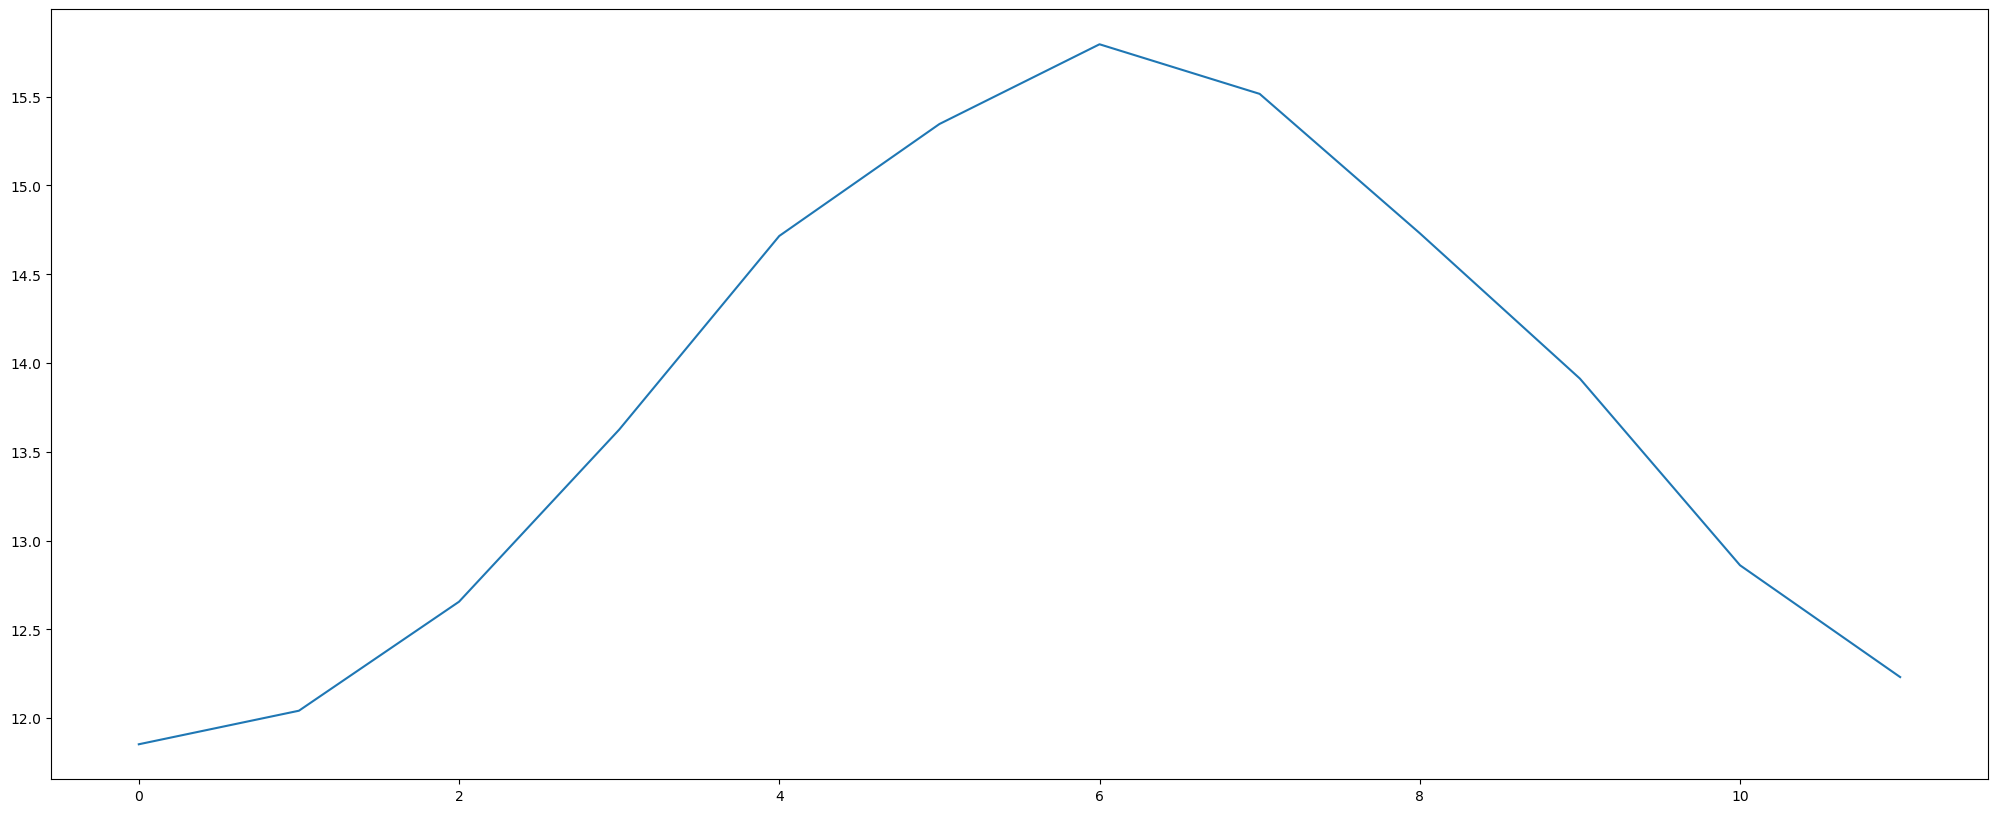

In [22]:
plt.plot(berkAnom18501900+absTemps19501980)
berkRefClimatology = berkAnom18501900+absTemps19501980


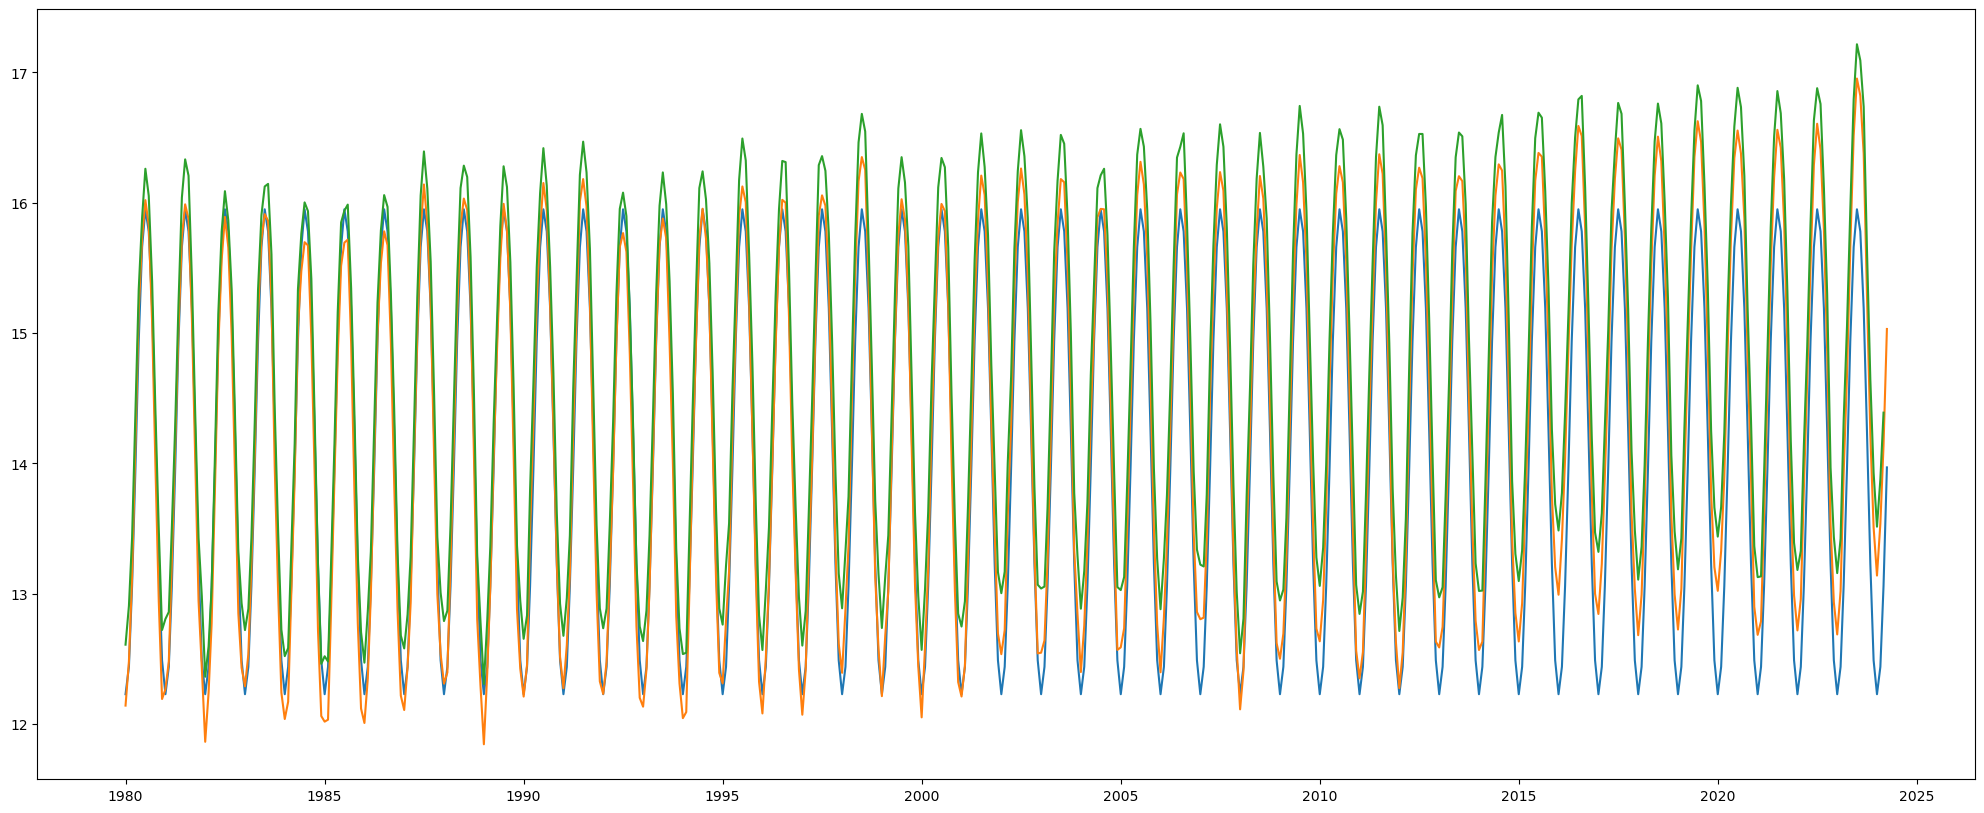

In [23]:
plt.plot(ERA5time,np.resize(absTemps19501980, (len(ERA5timeSeries))))
plt.plot(ERA5time,ERA5timeSeries - 273.15)
plt.plot(ERA5time[:len(berk_temp_anomaly["Monthly Anomaly"][12*130:])], np.resize(absTemps19501980, (len(berk_temp_anomaly["Monthly Anomaly"][12*130:]))) + berk_temp_anomaly["Monthly Anomaly"][12*130:])

In [24]:
timeSeries_19912020_ERA5 = ERA5timeSeries[(ERA5time > pd.to_datetime("1990-12-31")) &(ERA5time < pd.to_datetime("2021-01-01"))]
ref_clim_19912020_ERA5 = np.nanmean(np.reshape(timeSeries_19912020_ERA5, (-1,12)), axis = 0)

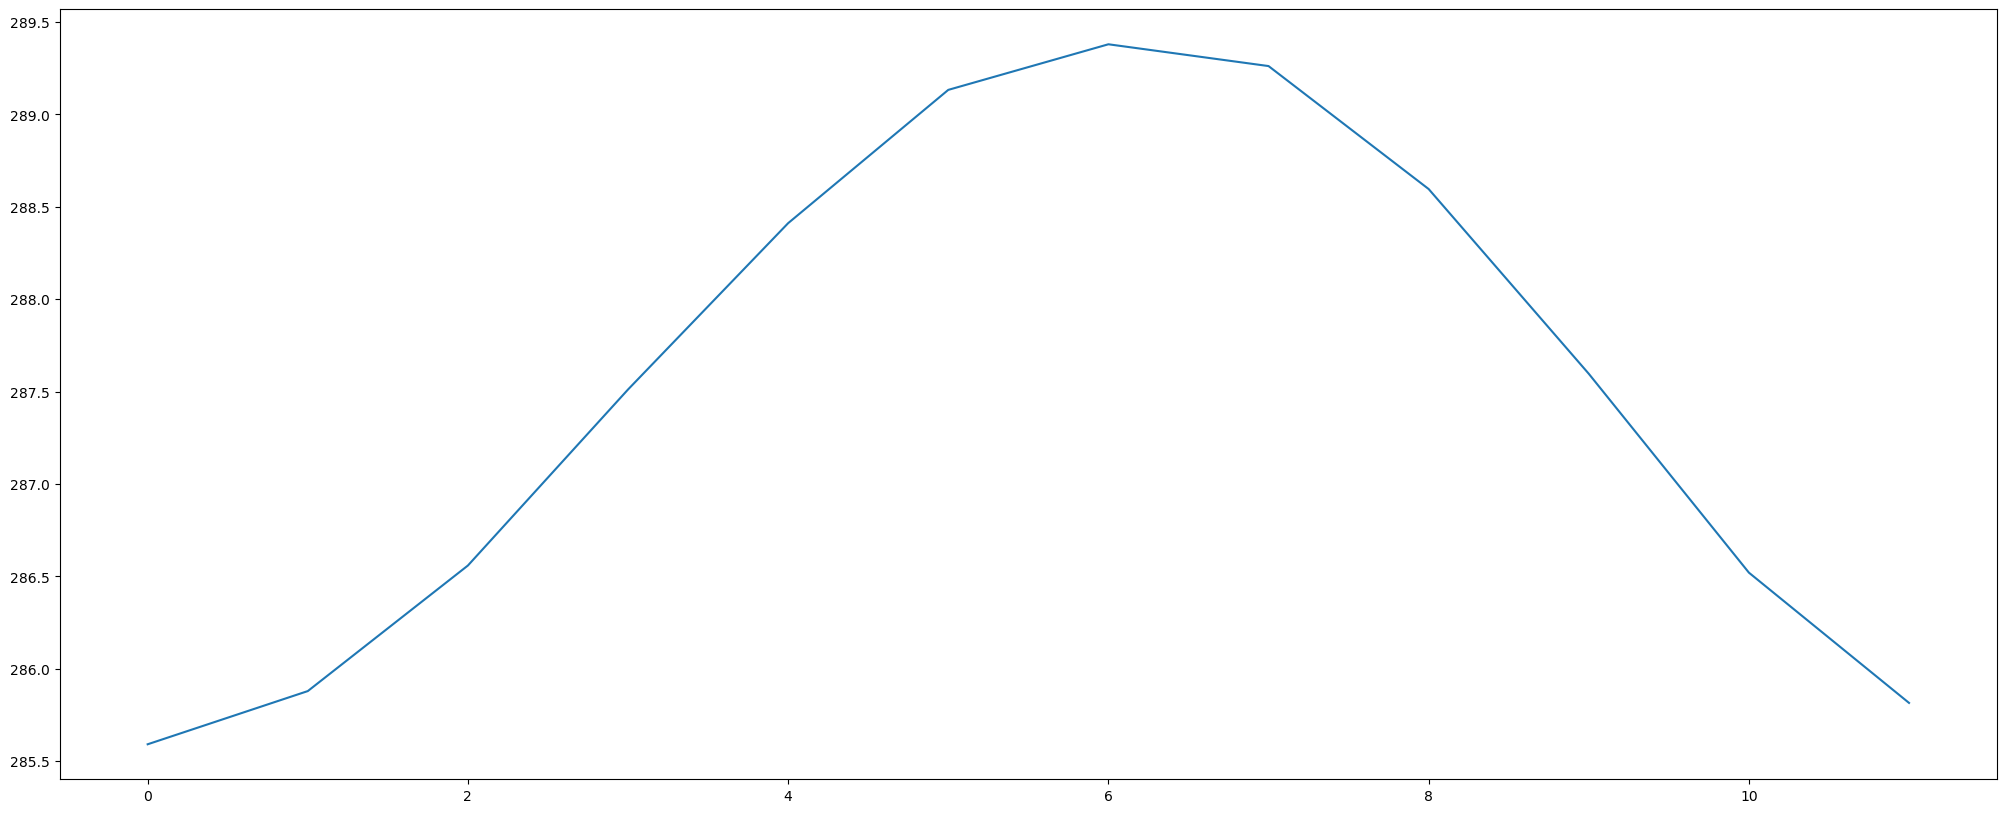

In [25]:
plt.plot(ref_clim_19912020_ERA5)

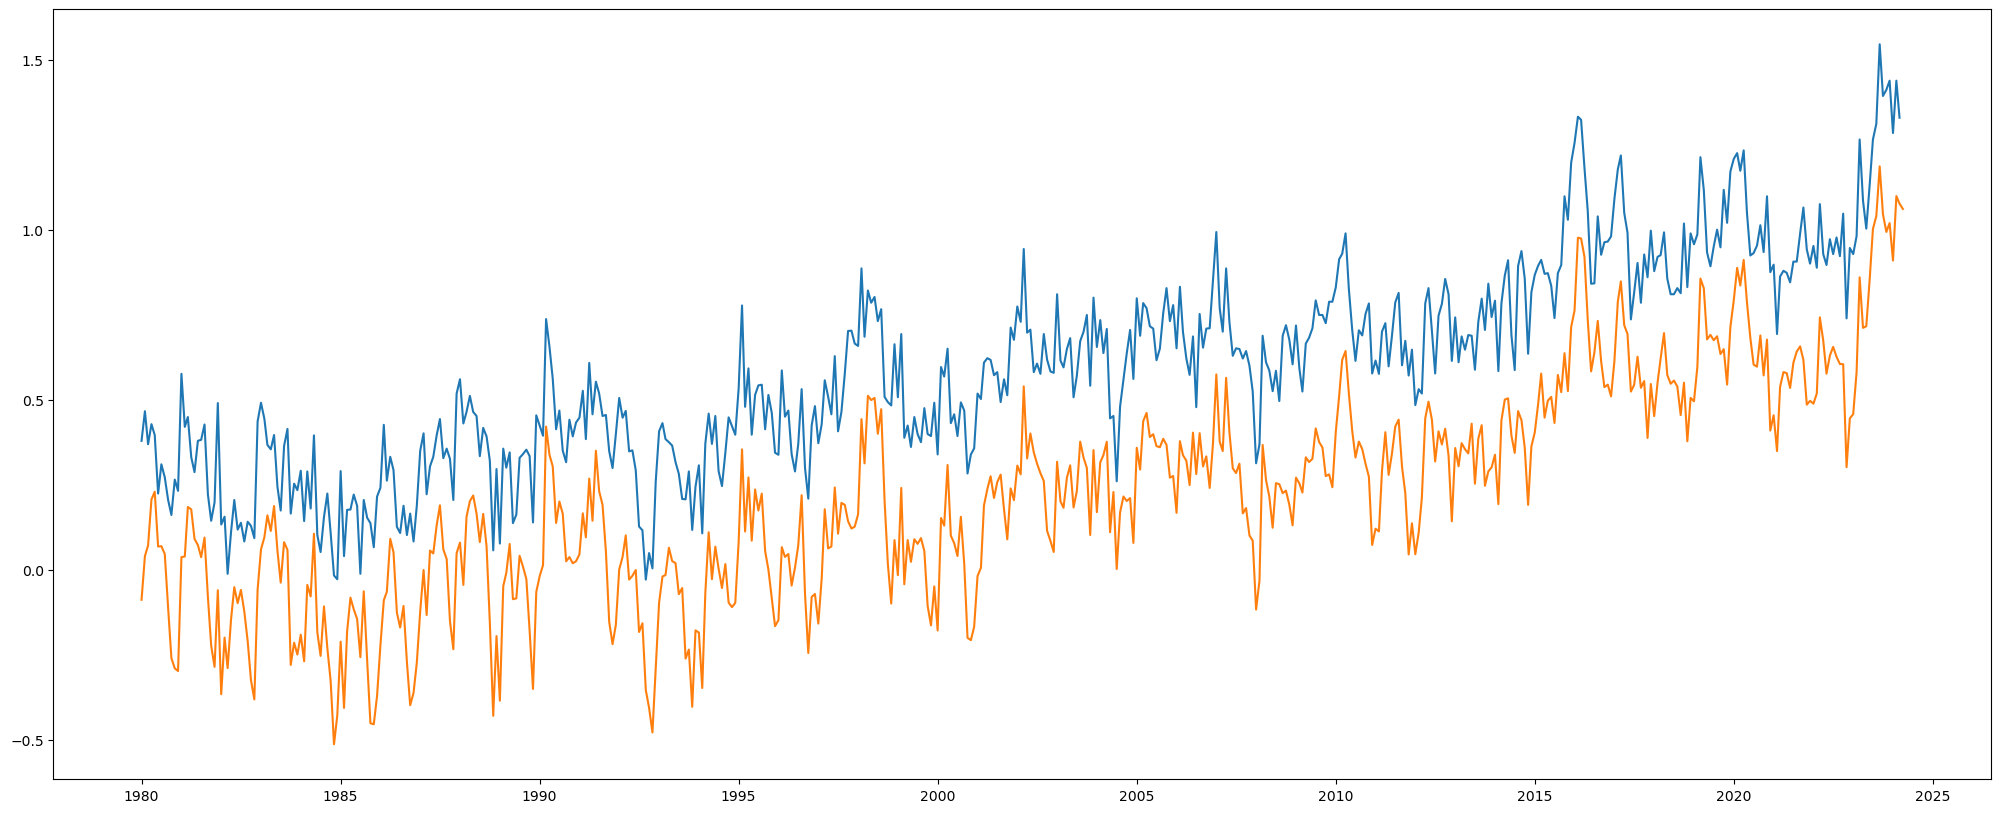

In [26]:
plt.plot(ERA5time[:len(berk_temp_anomaly["Monthly Anomaly"][12*130:])],  berk_temp_anomaly["Monthly Anomaly"][12*130:])
plt.plot(ERA5time,ERA5timeSeries - 273.15 - np.resize(absTemps19501980, (len(ERA5timeSeries))))


In [27]:
window = 60
ERA560monAvgAnom1950_80 = RunningAvgs(ERA5timeSeries - 273.15 - np.resize(absTemps19501980, (len(ERA5timeSeries))), window)
window = 60
ERA560monAvgAnom1991_2020 = RunningAvgs(ERA5timeSeries - np.resize(ref_clim_19912020_ERA5, (len(ERA5timeSeries))), window)

In [28]:
year = 90
month = 0
print(copernicus_graph_data["ERA5"][12*year + month])
print(copernicus_graph_data["start year"][12*year + month])
print(copernicus_graph_data["month"][12*year + month])

-0.665
1940
1


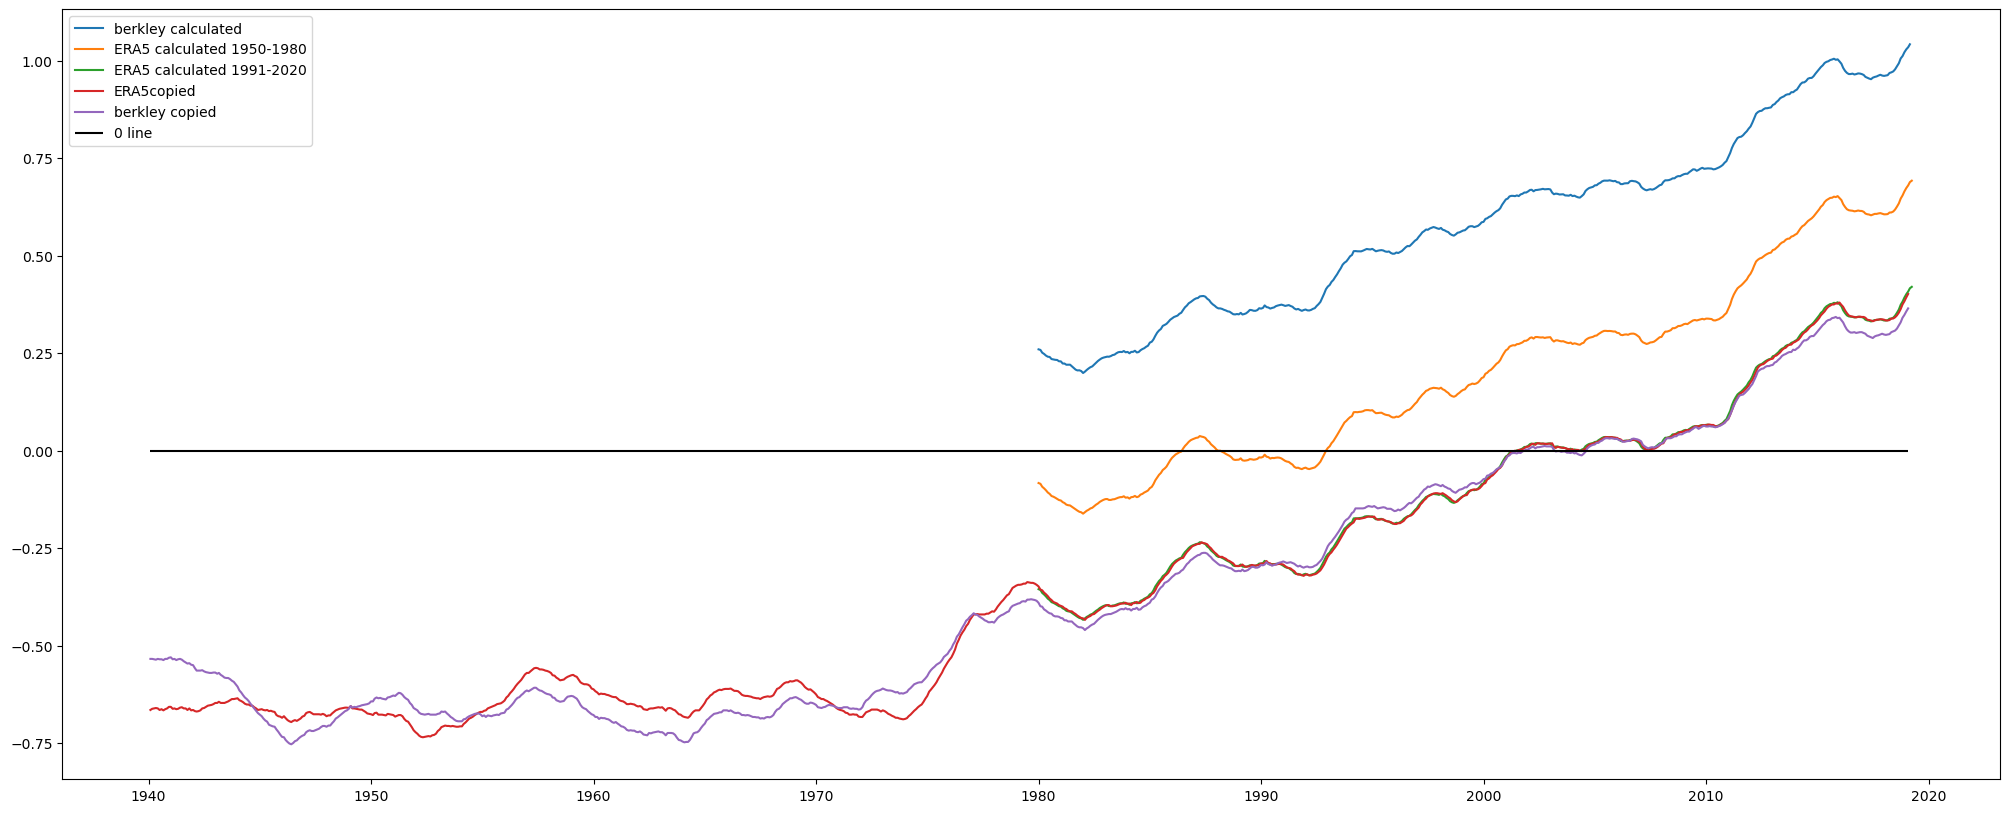

In [29]:
DateRange = pd.date_range("1940-01-01", "2019-02-01", freq="M")
plt.plot(ERA5time[:len(berk60monAvgAnom[12*130:])], berk60monAvgAnom[12*130:], label = "berkley calculated")
plt.plot(ERA5time[:len(ERA560monAvgAnom1950_80)], ERA560monAvgAnom1950_80, label = "ERA5 calculated 1950-1980")
plt.plot(ERA5time[:len(ERA560monAvgAnom1950_80)], ERA560monAvgAnom1991_2020, label = "ERA5 calculated 1991-2020")
plt.plot(DateRange,copernicus_graph_data["ERA5"][90*12:], label = "ERA5copied")
plt.plot(DateRange,copernicus_graph_data["Berkeley Earth"][90*12:], label = "berkley copied")
plt.hlines(0,DateRange[0], DateRange[-1], label = "0 line", color = "black")
plt.legend()

In [45]:
print(ERA5time[0].year)
#print(ERA5timeSeries)

AttributeError: 'numpy.datetime64' object has no attribute 'year'

In [30]:
colorRange = []
timeSeries = pd.to_datetime(ERA5time)
for year in np.unique(timeSeries.year):
    mask = timeSeries.year == year
    colorRange.append(np.nanmean(ERA5timeSeries[mask]))
    

In [31]:
colorRange2 = []
timeSeries = pd.to_datetime(ERA5time)
for year in np.unique(timeSeries.year):
    mask = timeSeries.year == year
    colorRange2.append(np.nanmean((ERA5timeSeries[mask])[0:4]))

287.2236571298016
1980
0.18143147118013386
287.25705095761924
1981
0.20847527276670844
287.05776382124213
1982
0.04708371848393524
287.2526282281237
1983
0.20489355043160581
287.039999199872
1984
0.03269714087390055
286.9996245990979
1985
0.0
287.0883899517997
1986
0.07188611618108007
287.24378622523784
1987
0.19773290466860732
287.27593077070577
1988
0.2237649820474776
287.1575924906988
1989
0.12792939883484006
287.3890079657844
1990
0.3153399055445112
287.3342457715201
1991
0.27099105388794437
287.1021713770776
1992
0.08304692508358258
287.14797976438973
1993
0.12014458708975055
287.1843024529339
1994
0.14956030988269556
287.36207296568904
1995
0.29352674886503816
287.2321098457308
1996
0.18827685511471012
287.354324973932
1997
0.28725208179436257
287.5429536238139
1998
0.4400119213912857
287.2740865615041
1999
0.22227145971134177
287.269017163026
2000
0.2181660361775771
287.42902616232095
2001
0.3477484144730847
287.5257078551985
2002
0.42604553373456805
287.5127432717543
2003
0.415

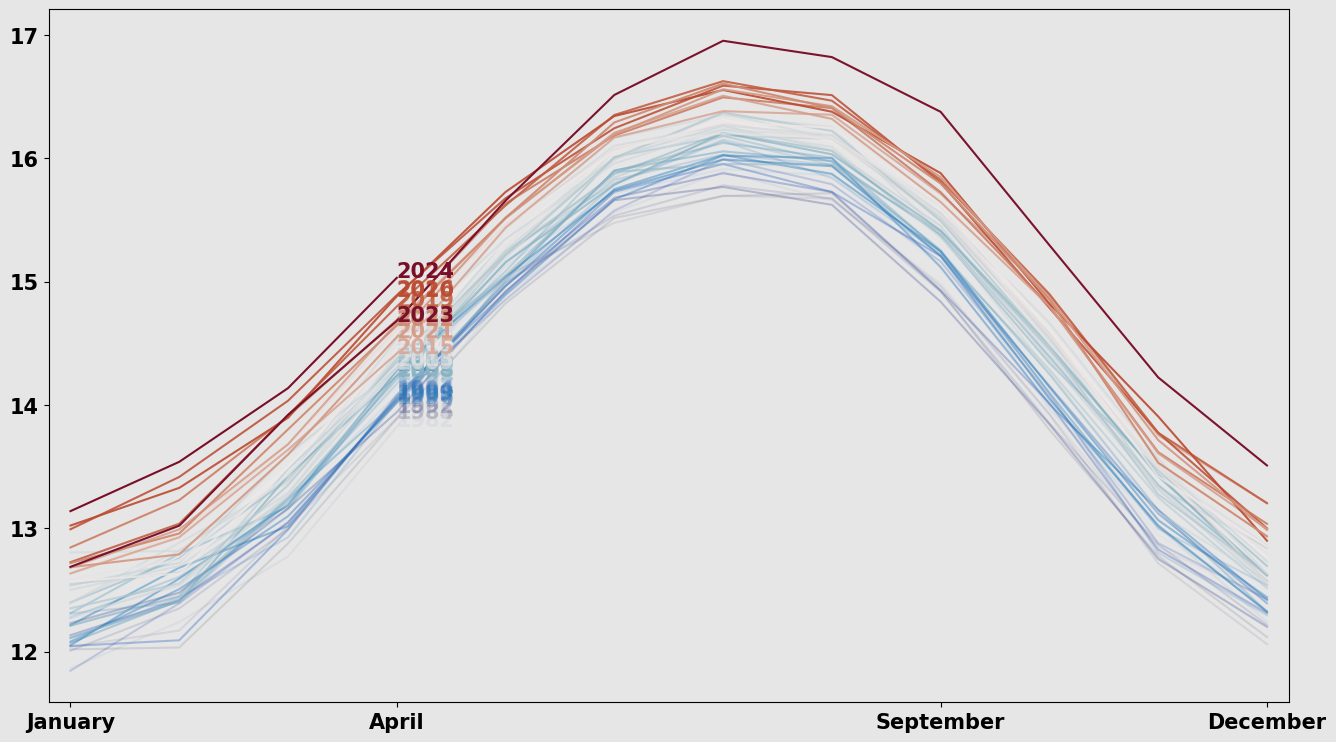

In [32]:
plt.rcParams["figure.figsize"] = (16,9)
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)
plt.figure(facecolor=(0.9,0.9,0.9,1))
ax = plt.axes()
ax.set_facecolor((0.9,0.9,0.9,1))
plt.xlim(-0.2, 11.2)
plt.xticks([0, 3, 8, 11], ["January", "April", "September", "December"])
for year in np.unique(timeSeries.year):
    mask = timeSeries.year == year
    colorAssgn = (np.nanmean(ERA5timeSeries[mask]) - min(colorRange))/((max(colorRange) - min(colorRange))*1.1)
    print(np.nanmean(ERA5timeSeries[mask]))
    print(year)
    print(colorAssgn)
    plottingArray = ERA5timeSeries[mask]
    
    if len(plottingArray) <12:
        zeros = np.zeros(12)
        zeros[:] = np.nan
        zeros[:len(plottingArray)] = plottingArray
        plottingArray = zeros
        colorAssgn = (np.nanmean(ERA5timeSeries[mask]) - min(colorRange2))/((max(colorRange2) - min(colorRange2))*1.1)
    plottingArray = plottingArray - 273.15
    if year == 2024:
        for i in range(0, 4):
            year2023line = plt.plot(plottingArray[:i + 1], color = cmap(colorAssgn), alpha = (year - 1980)/(44), linewidth = 3)
            year2023point = plt.scatter(i,plottingArray[i], color = cmap(colorAssgn), alpha = (year - 1980)/(44), s = 35)
            yearText = plt.text(i,(plottingArray)[i],str(year), color = cmap(colorAssgn), alpha = (year - 1980)/(44))
            plt.savefig("Global temperature Animation graph/globatempgraph" + str(year)+"2024" + str(i)) 
            yearText.remove()
            for item in year2023line:
                item.remove()
            year2023point.remove()
        plt.plot(plottingArray, color = cmap(colorAssgn), alpha = (year - 1980)/(44))
        plt.text(3,(plottingArray)[3],str(year), color = cmap(colorAssgn), alpha = (year - 1980)/(44)) 
        plt.savefig("Global temperature Animation graph/globatempgraph" + str(year))

    else:
        plt.plot(plottingArray, color = cmap(colorAssgn), alpha = (year - 1980)/(44))
        plt.text(3,(plottingArray)[3],str(year), color = cmap(colorAssgn), alpha = (year - 1980)/(44)) 
        plt.savefig("Global temperature Animation graph/globatempgraph" + str(year))


In [87]:
tempTapestry = np.reshape(np.concatenate([ERA5timeSeries - np.resize(ref_clim_19912020_ERA5, (len(ERA5timeSeries))),[np.nan, np.nan,np.nan, np.nan,np.nan, np.nan,np.nan, np.nan]]) , (-1,12))

array([[-2.99081467e-01, -2.48519667e-01, -2.76806723e-01,
        -1.84070360e-01, -9.13529894e-02, -2.53877661e-01,
        -2.09542059e-01, -2.84500856e-01, -3.67775551e-01,
        -4.55896060e-01, -4.29461225e-01, -4.72532069e-01],
       [-1.73617571e-01, -2.49693989e-01, -1.63674317e-01,
        -2.13170308e-01, -2.30018082e-01, -2.49443389e-01,
        -2.41754731e-01, -2.36321598e-01, -3.36037142e-01,
        -4.19027696e-01, -4.25137650e-01, -2.34794280e-01],
       [-5.76772973e-01, -4.88154898e-01, -6.37258516e-01,
        -5.37735393e-01, -3.72075591e-01, -4.20205877e-01,
        -3.38200679e-01, -4.53939119e-01, -4.65576117e-01,
        -5.20196935e-01, -5.20869196e-01, -2.33151096e-01],
       [-1.51077043e-01, -1.93221466e-01, -1.88229904e-01,
        -2.76719058e-01, -1.33361111e-01, -2.65929646e-01,
        -3.16691454e-01, -2.49831131e-01, -1.96967627e-01,
        -4.75549330e-01, -3.54152463e-01, -4.24033276e-01],
       [-4.01822664e-01, -5.57751237e-01, -3.9274794

In [105]:
zeros = np.zeros(np.shape(tempTapestry))
zeros[:] = np.nan
plt.rcParams["figure.figsize"] = (9,16)
for i in range(0, len(ERA5timeSeries)):
    print(i)
    zeros[int(i/12), i - 12*int(i/12)] = tempTapestry[int(i/12), i - 12*int(i/12)]
    plt.imshow(np.flip(zeros, axis = 0),cmap = cm.cm.balance, vmin = np.nanmin(tempTapestry), vmax = np.nanmax(tempTapestry), aspect = "auto")
    plt.savefig("tempTapestry anim/Tapestry" + str(i))
    plt.clf()
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

<Figure size 900x1600 with 0 Axes>

1980
-7.04302824102185
1981
-6.9440467200787985
1982
-7.213113341428861
1983
-7.08647630939086
1984
-7.14712566080016
1985
-7.248850489814292
1986
-7.22443257653296
1987
-7.2245561489685945
1988
-7.041322941410097
1989
-7.168528406652015
1990
-6.867505953446931
1991
-6.933765493434027
1992
-7.192452030190811
1993
-7.238668121118028
1994
-7.236592104199373
1995
-6.986753353834002
1996
-7.041743087691254
1997
-7.044708826146476
1998
-6.923854984096158
1999
-7.0822254176050405
2000
-7.059562232909715
2001
-6.923706697173397
2002
-6.783773271061148
2003
-6.874277722919689
2004
-6.9650293196494975
2005
-6.675276672574258
2006
-6.75507975150687
2007
-6.700880881237679
2008
-6.881123635853827
2009
-6.758342063807615
2010
-6.72255548644793
2011
-6.712150687367524
2012
-6.712546119161554
2013
-6.731304414890836
2014
-6.697470282014173
2015
-6.644556565075578
2016
-6.344720407252582
2017
-6.469998142498606
2018
-6.462855655718945
2019
-6.437152589107017
2020
-6.348625296218625
2021
-6.6244884015

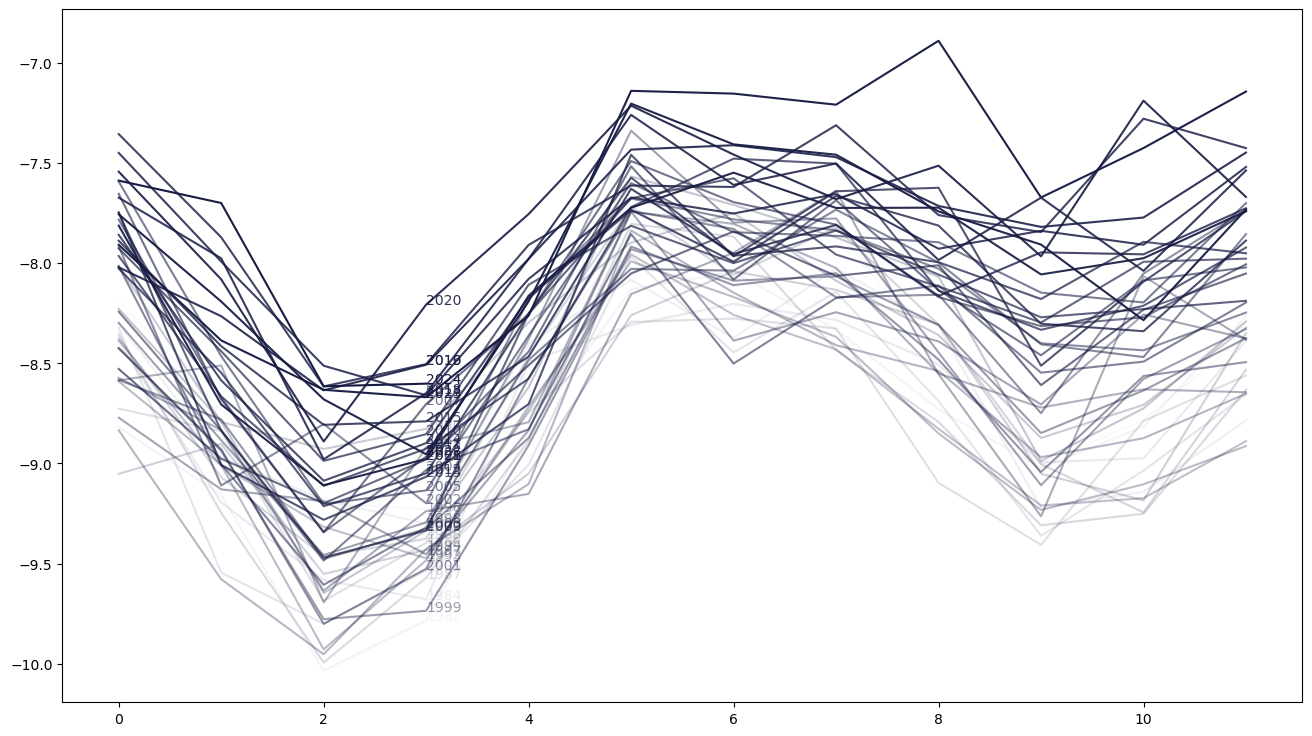

In [62]:
for file in fileBank:
    timeSeries = pd.to_datetime(file["time"])        
    for year in np.unique(timeSeries.year):
        mask = timeSeries.year == year
        colorAssgn = (np.nanmean(file["t2m"][mask]) - min(colorRange))/((max(colorRange) - min(colorRange))*1.1)
        print(year)
        print(colorAssgn)
        plottingArray = np.nanmean(file["t2m"][mask], axis = (1,2))
        if len(plottingArray) <12:
            zeros = np.zeros(12)
            zeros[:] = np.nan
            zeros[:len(plottingArray)] = plottingArray
            plottingArray = zeros

                
        plottingArray = plottingArray - berkRefClimatology - 273.15
        plt.plot(plottingArray, color = cmap(colorAssgn), alpha = (year - 1980)/(44))
        plt.text(3,(plottingArray)[3],str(year), color = cmap(colorAssgn), alpha = (year - 1980)/(44)) 